# Hybrid Filtering

Hybrid filtering adalah kombinasi dari beberapa sistem rekomendasi seperti menggabungkan collaborative filtering dengan content-based filtering.
<br><br>
Pada sistem ini ingin dibuat rekomendasi film untuk seseorang bernama Bunga. Dengan menggunakan hybrid filtering Bunga akan mendapatkan rekomendasi film yang akan dia tonton agar sesuai dengan seleranya Bunga dan film tersebut memang memiliki rating yang bagus dari orang lain.


## Import Package
Mengimpor package-package yang akan digunakan pada sistem berikut

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from math import sqrt

## Load Data
Mengambil data yang akan digunakan. Pada sistem ini data yang akan diambil adalah movie dan data user.<br>
Data movie adalah data yang memuat hal-hal mengenai film tersebut yaitu genre, rating film, dan asal negara produksi film.<br>
Data user adalah data yang memuat rating pengguna pada beberapa film, apabila pengguna belum menonton film tersebut maka ratingnya akan *default* 0.

#### Get data movie

In [4]:
data=pd.read_csv('Movie.csv')
data

,Unnamed: 0,Movie,Country,Genre,Ratings
0,0,Ada Apa dengan Cinta 2,Indonesia,Romance Drama,3
1,1,Gundala,Indonesia,Action Superhero,4
2,2,Dilan 1991,Indonesia,Romance Drama,4
3,3,Bumi Manusia,Indonesia,Drama Action,3
4,4,Dua Garis Biru,Indonesia,Drama Romance,2
5,5,Avengers: End Game,America,Superhero Action,4
6,6,The Lion King,America,Animation Drama,3
7,7,Aladdin,America,Drama Animation,4
8,8,Spiderman: Far From Home,America,Superhero Action,3
9,9,Captain Marvel,America,Superhero Action,3


#### Drop unuse columns

In [5]:
data=data.drop(columns=data.columns[0])
data

,Movie,Country,Genre,Ratings
0,Ada Apa dengan Cinta 2,Indonesia,Romance Drama,3
1,Gundala,Indonesia,Action Superhero,4
2,Dilan 1991,Indonesia,Romance Drama,4
3,Bumi Manusia,Indonesia,Drama Action,3
4,Dua Garis Biru,Indonesia,Drama Romance,2
5,Avengers: End Game,America,Superhero Action,4
6,The Lion King,America,Animation Drama,3
7,Aladdin,America,Drama Animation,4
8,Spiderman: Far From Home,America,Superhero Action,3
9,Captain Marvel,America,Superhero Action,3


#### Set 'Movie' as index

In [6]:
data=data.set_index('Movie')
data.head()

,Country,Genre,Ratings
Movie,,,
Ada Apa dengan Cinta 2,Indonesia,Romance Drama,3
Gundala,Indonesia,Action Superhero,4
Dilan 1991,Indonesia,Romance Drama,4
Bumi Manusia,Indonesia,Drama Action,3
Dua Garis Biru,Indonesia,Drama Romance,2


#### Count Missing Value

In [7]:
count_missing = data.isnull().sum().sort_values(ascending = False)
print(count_missing)

Ratings    0
Genre      0
Country    0
dtype: int64


#### Get data user

In [8]:
data2=pd.read_csv('user.csv')
data2.head()

,Timestamp,Nama Anda,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
0,2019/09/17 10:18:21 AM GMT+7,Hania,3.0,5.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
1,2019/09/17 10:18:37 AM GMT+7,Topik Zulkarnain,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,4.0,2.0
2,2019/09/17 10:18:39 AM GMT+7,AhokTemanFirli,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0
3,2019/09/17 10:18:42 AM GMT+7,franadek,4.0,4.0,4.0,5.0,3.0,5.0,4.0,5.0,4.0,4.0
4,2019/09/17 10:19:01 AM GMT+7,OM INDRA,3.0,NaN,2.0,NaN,5.0,5.0,NaN,1.0,5.0,5.0


#### Drop unuse columns

In [9]:
data2=data2.drop(columns=data2.columns[0])
data2.head()

,Nama Anda,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
0,Hania,3.0,5.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
1,Topik Zulkarnain,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,4.0,2.0
2,AhokTemanFirli,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0
3,franadek,4.0,4.0,4.0,5.0,3.0,5.0,4.0,5.0,4.0,4.0
4,OM INDRA,3.0,NaN,2.0,NaN,5.0,5.0,NaN,1.0,5.0,5.0


#### Count missing value

In [10]:
count_missing = data2.isnull().sum().sort_values(ascending = False)
print(count_missing)

Bumi Manusia                18
Dua Garis Biru              15
The Lion King               13
Gundala                     11
Aladdin                     10
Dilan 1991                  10
Spiderman: Far From Home     8
Ada Apa dengan Cinta 2       7
Captain Marvel               6
Avengers: End Game           5
Nama Anda                    0
dtype: int64


#### Fill the missing value

In [11]:
data2=data2.fillna(0)
data2.head()

,Nama Anda,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
0,Hania,3.0,5.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
1,Topik Zulkarnain,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,4.0,2.0
2,AhokTemanFirli,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0
3,franadek,4.0,4.0,4.0,5.0,3.0,5.0,4.0,5.0,4.0,4.0
4,OM INDRA,3.0,0.0,2.0,0.0,5.0,5.0,0.0,1.0,5.0,5.0


#### Initialize variabel datasett

In [12]:
datasett=data2.set_index('Nama Anda')
datasett.head()

,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
Nama Anda,,,,,,,,,,
Hania,3.0,5.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
Topik Zulkarnain,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,4.0,2.0
AhokTemanFirli,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0
franadek,4.0,4.0,4.0,5.0,3.0,5.0,4.0,5.0,4.0,4.0
OM INDRA,3.0,0.0,2.0,0.0,5.0,5.0,0.0,1.0,5.0,5.0


## Data Visualization
Visualisasi dibawah ini digunakan untuk memudahkan dalam melihat jumlah rating dari film-film, selain itu dapat dilihat pula genre film yang paling banyak.

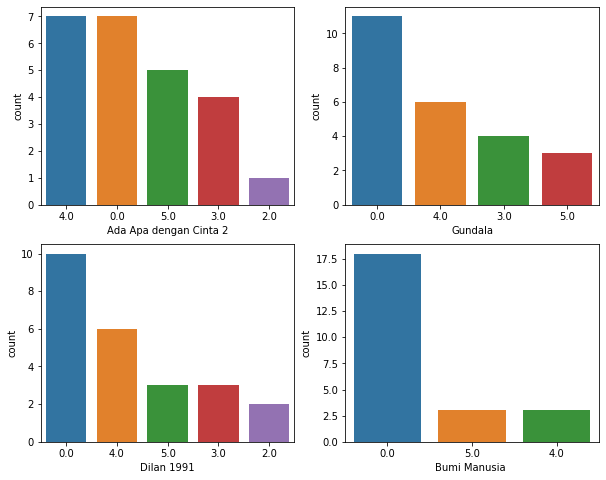

In [31]:
f=plt.figure(figsize=(10,8))
f.add_subplot(2,2,1)
sns.countplot(data2['Ada Apa dengan Cinta 2'],order=data2['Ada Apa dengan Cinta 2'].value_counts().index)
f.add_subplot(2,2,2)
sns.countplot(data2['Gundala'],order=data2['Gundala'].value_counts().index)
f.add_subplot(2,2,3)
sns.countplot(data2['Dilan 1991'],order=data2['Dilan 1991'].value_counts().index)
f.add_subplot(2,2,4)
sns.countplot(data2['Bumi Manusia '],order=data2['Bumi Manusia '].value_counts().index)

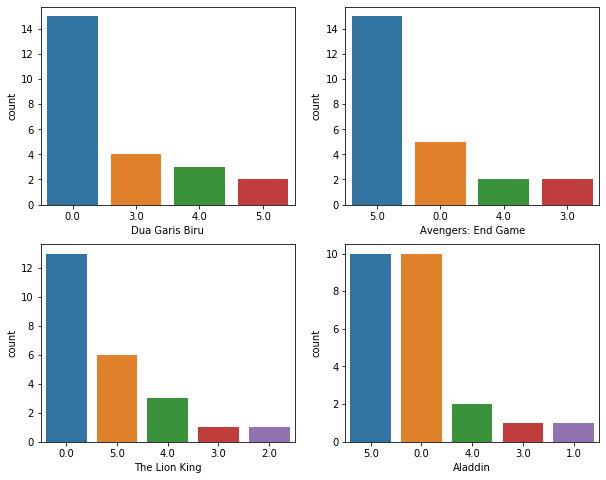

In [34]:
f=plt.figure(figsize=(10,8))
f.add_subplot(2,2,1)
sns.countplot(data2['Dua Garis Biru'],order=data2['Dua Garis Biru'].value_counts().index)
f.add_subplot(2,2,2)
sns.countplot(data2['Avengers: End Game'],order=data2['Avengers: End Game'].value_counts().index)
f.add_subplot(2,2,3)
sns.countplot(data2['The Lion King'],order=data2['The Lion King'].value_counts().index)
f.add_subplot(2,2,4)
sns.countplot(data2['Aladdin'],order=data2['Aladdin'].value_counts().index)

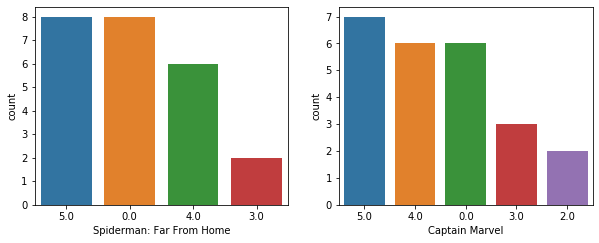

In [35]:
f=plt.figure(figsize=(10,8))
f.add_subplot(2,2,1)
sns.countplot(data2['Spiderman: Far From Home'],order=data2['Spiderman: Far From Home'].value_counts().index)
f.add_subplot(2,2,2)
sns.countplot(data2['Captain Marvel'],order=data2['Captain Marvel'].value_counts().index)

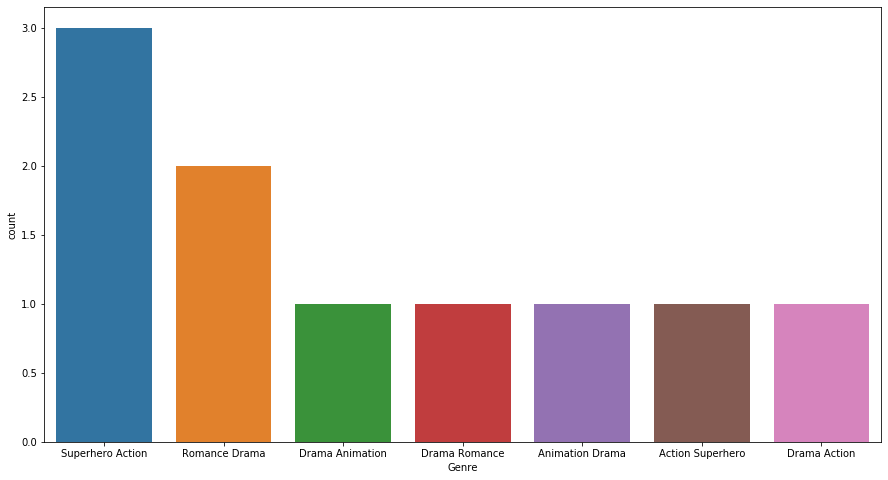

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(data['Genre'],order=data['Genre'].value_counts().index)

## Content-based
Pada code dibawah ini akan digunakan untuk mencari rekomendasi untuk user bernama bunga.

In [303]:
datatest=data2[data2['Nama Anda']=='bunga']

In [304]:
datatest.set_index(datatest['Nama Anda'], inplace=True)

In [305]:
datatest.drop(columns=['Nama Anda'], inplace=True)

C:\Users\putrib064183\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Separate Unwatched Movie and Watched Movie
Code dibawah ini digunakan untuk memisahkan film yang belum ditonton oleh bunga dan film yang telah ditonton oleh bunga

In [308]:
print ('Unwatched Movie = ')
unwatched = []
for i in range(len(datatest.columns)):
    if datatest.loc['bunga'][i] == 0:
        unwatched.append(datatest.columns[i])
        print(datatest.columns[i])
print ('-----------------------------')
print ('Watched Movie = ')
watched = []
for i in range(len(datatest.columns)):
    if datatest.loc['bunga'][i] > 0:
        watched.append(datatest.columns[i])
        print(datatest.columns[i])

Unwatched Movie = 
Ada Apa dengan Cinta 2
Bumi Manusia 
Dua Garis Biru
-----------------------------
Watched Movie = 
Gundala
Dilan 1991
Avengers: End Game
The Lion King
Aladdin
Spiderman: Far From Home
Captain Marvel


#### Merge watched movie and unwatched movie columns and add description
Menggabungkan kolom film yang belum ditonton dan yang sudah ditonton oleh bunga. Setelah itu menambahkan kolom baru yaitu kolom description yang berisi gabungan fitur dari sebuah film untuk kemudian dihitung bobotnya.

In [309]:
merge=pd.concat([data.loc[unwatched],data.loc[watched]],axis=0)
merge['Description']=pd.Categorical(merge['Country']+' '+merge['Genre'])
merge

,Country,Genre,Ratings,Description
Movie,,,,
Ada Apa dengan Cinta 2,Indonesia,Romance Drama,3,Indonesia Romance Drama
Bumi Manusia,Indonesia,Drama Action,3,Indonesia Drama Action
Dua Garis Biru,Indonesia,Drama Romance,2,Indonesia Drama Romance
Gundala,Indonesia,Action Superhero,4,Indonesia Action Superhero
Dilan 1991,Indonesia,Romance Drama,4,Indonesia Romance Drama
Avengers: End Game,America,Superhero Action,4,America Superhero Action
The Lion King,America,Animation Drama,3,America Animation Drama
Aladdin,America,Drama Animation,4,America Drama Animation
Spiderman: Far From Home,America,Superhero Action,3,America Superhero Action


## TF-IDF
Pembobotan menggunakan tfidf untuk mengetahui bobot dari masing-masing film berdasarkan fitur film tersebut.

In [310]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1,3),min_df=0)
countwatched = tf.fit_transform(merge.loc[watched]['Description'])
countunwatched = tf.fit_transform(merge.loc[unwatched]['Description'])
count=tf.fit_transform(merge['Description'])

## Cosine Similartity
Digunakan cosine similarity dengan memanggil package linear kernel untuk melihat kesamaan fitur dari film-film tersebut.

In [311]:
cosine_similarities = linear_kernel(count, count)
result=pd.DataFrame(cosine_similarities,index=arranged_data.index,columns=arranged_data.index)

Dibawah ini adalah hasil bobot dan tingkat kesamaan dari film yang sudah ditonton bunga (kolom) dan film yang belum ditonton bunga (baris)

In [312]:
result[watched].loc[unwatched]

Movie,Gundala,Dilan 1991,Avengers: End Game,The Lion King,Aladdin,Spiderman: Far From Home,Captain Marvel
Movie,,,,,,,
Ada Apa dengan Cinta 2,0.100849,0.100849,0.0,0.109281,0.0,0.23184,0.0
Bumi Manusia,0.100849,0.100849,0.0,0.109281,0.0,0.23184,0.0
Dua Garis Biru,0.100849,0.100849,0.0,0.109281,0.0,0.23184,0.0


Code dibawah ini digunakan untuk melihat rekomendasi film untuk bunga, apabila bunga menyukai film aladdin, maka akan direkomendasikan film yang belum bunga tonton yang memiliki kesamaan dengan aladdin

In [313]:
content_based=pd.DataFrame(new.loc[watched][unwatched]).loc[['Aladdin']]
recommend=list(content_based.transpose().sort_values('Aladdin',ascending=False)[0:3].index)
recommend

['Bumi Manusia ', 'Ada Apa dengan Cinta 2', 'Dua Garis Biru']

Mengubah data set menjadi *dictionary* untuk dilakukan collaborative filtering

In [314]:
dataset = datasett.to_dict(orient='index')

In [315]:
dataset

{'ANI': {'Ada Apa dengan Cinta 2': 4.0,
  'Aladdin': 4.0,
  'Avengers: End Game': 0.0,
  'Bumi Manusia ': 5.0,
  'Captain Marvel': 4.0,
  'Dilan 1991': 4.0,
  'Dua Garis Biru': 0.0,
  'Gundala': 0.0,
  'Spiderman: Far From Home': 3.0,
  'The Lion King': 0.0},
 'AhokTemanFirli': {'Ada Apa dengan Cinta 2': 0.0,
  'Aladdin': 0.0,
  'Avengers: End Game': 3.0,
  'Bumi Manusia ': 0.0,
  'Captain Marvel': 4.0,
  'Dilan 1991': 0.0,
  'Dua Garis Biru': 0.0,
  'Gundala': 0.0,
  'Spiderman: Far From Home': 0.0,
  'The Lion King': 0.0},
 'Damar Teman Firli': {'Ada Apa dengan Cinta 2': 5.0,
  'Aladdin': 0.0,
  'Avengers: End Game': 5.0,
  'Bumi Manusia ': 0.0,
  'Captain Marvel': 0.0,
  'Dilan 1991': 0.0,
  'Dua Garis Biru': 0.0,
  'Gundala': 0.0,
  'Spiderman: Far From Home': 5.0,
  'The Lion King': 0.0},
 'Dpv': {'Ada Apa dengan Cinta 2': 5.0,
  'Aladdin': 0.0,
  'Avengers: End Game': 5.0,
  'Bumi Manusia ': 0.0,
  'Captain Marvel': 5.0,
  'Dilan 1991': 4.0,
  'Dua Garis Biru': 0.0,
  'Gundala': 

## Collaborative Filtering

In [316]:
def person_correlation(person1, person2):

   # To get both rated items
    both_rated = {}
    for item in dataset[person1]:
        if item in dataset[person2]:
            both_rated[item] = 1

    number_of_ratings = len(both_rated)

    # Checking for ratings in common
    if number_of_ratings == 0:
        return 0

    # Add up all the preferences of each user
    person1_preferences_sum = sum([dataset[person1][item] for item in both_rated])
    person2_preferences_sum = sum([dataset[person2][item] for item in both_rated])

    # Sum up the squares of preferences of each user
    person1_square_preferences_sum = sum([pow(dataset[person1][item],2) for item in both_rated])
    person2_square_preferences_sum = sum([pow(dataset[person2][item],2) for item in both_rated])

    # Sum up the product value of both preferences for each item
    product_sum_of_both_users = sum([dataset[person1][item] * dataset[person2][item] for item in both_rated])

    # Calculate the pearson score
    numerator_value = product_sum_of_both_users - (person1_preferences_sum*person2_preferences_sum/number_of_ratings)
    denominator_value = sqrt((person1_square_preferences_sum - pow(person1_preferences_sum,2)/number_of_ratings) * (person2_square_preferences_sum -pow(person2_preferences_sum,2)/number_of_ratings))

    if denominator_value == 0:
        return 0
    else:
        r = numerator_value / denominator_value
        return r

def user_recommendations(person):

    # Gets recommendations for a person by using a weighted average of every other user's rankings
    totals = {}
    simSums = {}
    rankings_list =[]
    for other in dataset:
        # don't compare me to myself
        if other == person:
            continue
        sim = person_correlation(person,other)
        #print ">>>>>>>",sim

        # ignore scores of zero or lower
        if sim <=0: 
            continue
        for item in dataset[other]:

            # only score movies i haven't seen yet
            if item not in dataset[person] or dataset[person][item] == 0:

            # Similrity * score
                totals.setdefault(item,0)
                totals[item] += dataset[other][item]* sim
                # sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+= sim

        # Create the normalized list

    rankings = [(total/simSums[item],item) for item,total in totals.items()]
    rankings.sort()
    rankings.reverse()
    # returns the recommended items
    recommendataions_list = [recommend_item for score,recommend_item in rankings]
    return recommendataions_list, rankings

Code dibawah ini digunakan untuk memberikan rekomendasi film untuk bunga dengan melihat bobot fitur dari kesamaan film dan diurutkan berdasarkan film yang diberikan rating tertinggi oleh pengguna lain. Dengan rekomendasi ini, bunga memiliki peluang untuk menonton film yang bagus dan cocok dengan dirinya.

In [317]:
Hybrid_recommendation=pd.DataFrame(user_recommendations('bunga')[1],columns=['Bobot','Movie'])
Hybrid_recommendation=Hybrid_recommendation.set_index('Movie').loc[recommend]
Hybrid_recommendation=Hybrid_recommendation.sort_values('Bobot',ascending=False)
Hybrid_recommendation

,Bobot
Movie,
Ada Apa dengan Cinta 2,2.439263
Dua Garis Biru,1.249705
Bumi Manusia,0.499773


# Conclusion

Dengan hybrid filtering maka peringkat setiap item yang direkomendasikan bisa menjadi ukuran untuk bobot. Dengan cara ini, rekomendasi tertinggi menerima bobot tertinggi. Pada kasus ini Bunga mendapatkan rekomendasi film yang belum ditonton berdasarkan kesamaan dari film yang sudah ditonton dengan film yang belum ditonton. Setelah itu, diurutkan berdasarkan rating film dari pengguna lain untuk disarankan. Pada kasus ini *recommendation system* bekerja dengan baik untuk memberikan rekomendasi kepada pengguna, apabila *recommendation system* diterapkan pada aplikasi untuk menonton film maka pengguna akan mengurangi kebingungan pengguna mengenai film mana yang bagus dan sesuai dengan dirinya.
<br><br>
Selain itu *recommendation system* juga dapat digunakan pada aplikasi lain contohnya seperti aplikasi pemesan makanan. Jika diterapkan pada aplikasi tersebut maka jika pengguna ingin memesan makanan ia tidak akan bingung atau kesulitan menentukan pilihannya. Dengan adanya *recommendation system* dapat membuat aplikasi lebi proaktif kepada penggunaa.